In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# mglearn
# pip install mglearn
import mglearn

from sklearn.model_selection import train_test_split

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#  선형 회귀(선형 모델)

y = w[0] * x[0] + w[1] * x[1] + ... + b

w(가중치, 기울기) = 모델 파라미터 : 스스로 학습하여 찾음

In [ ]:
# 선형회귀 방식 샘플
mglearn.plots.plot_linear_regression_wave()

# 나타나는 점들 훈련용 실제 데이터, 선은 예측선, 선 : 입력된 데이터의 차이, 평균제곱오차(MSE : mean square error)
# 학습에 의해 찾은 최적의 결과값 : w[0]: 0.393906  b: -0.031804
# KNN보다 단순한 형태인 직선을 갖는다 (but 차원이 높아지면 KNN에서 할수없었던 경계면을 만들어줌  = 초평면 hyperplane)
# 2, 3 차원에서는 경계면을 갖는 형태 

In [4]:
# 선형회귀 구현할 메서드
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
X, y = mglearn.datasets.make_wave(n_samples=60)

# 훈련용, 테스트용 나누기 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [ ]:
# 선형회귀 
lr = LinearRegression() # 선형회귀 이웃의 개수 홀수로 직접 지정 할 수 없다(하이퍼파라미터 없음) / 직접 제어 불가 / 선능대로 사용해야함 

# 준비
lr.fit(X_train, y_train)

In [ ]:
dir(lr)

# coef 가중치(=기울기) 저장 intercept 절편 저장
print("가중치 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

print("훈련 점수 : ",lr.score(X_train, y_train)) # 0.67 <- 훈련점수 그리 좋진않다.. 그러나 테스트 점수가 좋으면된다
print("테스트 점수 : ",lr.score(X_test, y_test)) # 0.66 <- 얘도 뭐.. 샘플 개수가 적어서 그런가보당...ㅎ

In [ ]:
# 주제 : 전기생산량과 소비량
# 귀무가설 : 전기 생산량과 전기 소비량간의 상관관계가 없다
# 대립가설 : 전기 생산량과 전기 소비량간의 상관관계가 있다

# 월별 전기 사용량(백만 kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 생산량 4일때 사용량은 얼마인가?

In [ ]:
# 관계 검정

# R과 비슷한 패키지 지니고 있는 애 / 통계기반 객체 가지고있음
from scipy import stats

result = stats.linregress(X, y) #  pvalue=9.238421943157891e-05 관계가 있다
result

In [ ]:
# fit 훈련데이터 넘길때 입력형식은 shape이 2차원이여야한다 but X값은 현재 list 형식. 형식을 바꿔줘야한다
num = np.array(X) # list -> 배열로 바꿔주기
num = num.reshape(-1, 1)
lr2 = LinearRegression().fit(num, y) 

print(lr2.coef_, lr2.intercept_) 
# 위에서 stats를 통해 구한것과 같은 값이 나온것을 볼수있다 # 평균제곱오차라는 같은 알고리즘으로 풀었기때문에 가능
# 대신 stats는 통계분석에 가까운 정보를 더 많이 제공한다 
# coef_ : 가중치(w), 계수  라고 말하자

In [ ]:
# 그래프 그리기
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)

# 산포도
plt.scatter(X, y) # 뚜렷한 양의 상관관계 나타냄
plt.plot(np.array(X), slope*np.array(X)+intercept) \
# np.array(X) : X자리 : plot은 배열로 넘겨줘야한다
# slope*np.array(X)+intercept : Y 자리 : wx + b

In [ ]:
# 생산량 4일때의 사용량 궁금했으니 
result = slope * 4 + intercept
print("결과 : ", result)

In [ ]:
# 고차원 특성에 대한 과대적합
X, y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# 선형회귀 
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("훈련 점수 : ",lr.score(X_train, y_train)) # 0.95 -> 오.. 결과 좋음 
print("테스트 점수 : ",lr.score(X_test, y_test)) # 0.61 -> 음.. 훈련에만 적합한 과대적합 현상 나타남

### 릿지(Ridge) 회귀 모델
과대적합을 해결하기위한 모델 

라쏘, 엘라스틱(릿지 + 라쏘) 등등 있음 
 
- L2 규제(Regularization) : L2 norm의 과대적합 제어하기 위해 패널티 주는거 / 기본 값에 알파값 더해주기..
        1/n ∑(y-y')^2 + α∑(w^2)  
      알파 = 가중치의 어떤 값을 계산해서 특성에 어떻게 영향을 미치게 할것인지 계산하는것 
      
- MSE항에 Penalty항 추가 
- 알파를 크게 하면 Penalty의 효과가 커지고(=가중치 감소), 작게 하면 그 반대가 된다. 

In [40]:
# 릿지 불러오기
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha의 기본값 = 1.0 / 알파값 조절에 따라 성능이 변경됨 
print("훈련 점수 : ",ridge.score(X_train, y_train)) 
print("테스트 점수 : ",ridge.score(X_test, y_test)) 
# 위에 선형회귀와 비교했을때 테스트 점수가 75%로 더 큰 값이 나왔으므로 이 데이터는 릿지회귀모델을 사용해야함

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744755


In [ ]:
# 알파값을 높게 줘보자아아아아ㅏ

ridge10 = Ridge(alpha=10).fit(X_train, y_train) # alpha = 10.0 
print("훈련 점수 : ",ridge10.score(X_train, y_train)) # 알파값 높였더니 훈련값 10%나 낮아짐
print("테스트 점수 : ",ridge10.score(X_test, y_test)) # 테스트 점수도 낮아짐
# 알파값 조절을 통해서 어떤 알파값이 가장 적절한지 알아볼수있음 
# alpha=10 은 규제를 너무 강하게 한것으로 볼 수 있다 
# 적당히 조절해주는게 필요해요......


In [ ]:
# 알파값을 낮게 줘보자아아아아ㅏ

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) # alpha = 0.1
print("훈련 점수 : ",ridge01.score(X_train, y_train)) # 훈련값이 확 높아짐을 볼수있음 
print("테스트 점수 : ",ridge01.score(X_test, y_test))

In [ ]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# 규제를 강하게 했을때는 0에 가깝게 모여있음을 확인할수 있따
# linearRegression 은 프레임 밖으로 넘어가있는것도 볼수있네.....하하항한허망허ㅣㄴㅁㄹㄴㅇㄹ 집가고싶다

In [ ]:
# 알파값을 1.0으로 고정시킨 상태에서 데이터의 크기 조절

mglearn.plots.plot_ridge_n_samples()
# x축 : 데이터 개수 / y축 : 설명계수, 성능
# 훈련데이터셋이 가장 좋음을 볼수있다
# 훈련 ridge와 linear 비교해보면 훈련 linear이 좋음. 거의 100% 에서 시작하는데 
# test에서 보면 ridge가 훨신 좋음, linear은 데이터가 400개 이상 넘을때부터 훈련이 시작됨을 볼수있음 -> 극단적
# test ridge는 데이터 수가 적어도 훈련하는데 있어 큰 영향을 받지않음을 볼수있다 
# 처음에는 차이가 많이 났지만 마지막으로가면 test ridge나 linear값이나 같아짐을 볼수잇다
# 즉, 데이터가 많아질수록 성능은 좋아진다 어떤 방법을 쓰느냐가 상관없어진다 
# 데이터의 크기가 머신러닝의 힘이다. 다다익선^^

# training linear 데이터가 많아질수록 과대적합이 줄어듦을 볼수있다. 
# 데이터가 많아지면 과대적합 현상도 자연스럽게 해결되는 양상을 보여준다 

# 그냥 결론은 데이터가 많으면 모든게 다 해결되니까 데이터 많이 가져다 써라!!!!!!!!!!

### 라쏘(Lasso) 회귀 모델

- L1 규제 사용
        1/n ∑(y-y')^2 + α∑(w^2) + α∑(|w|)
        가중치가 0이면 특성을 아예 제거할수있다
        
- 알파를 쿠게 하면 패널티의 효과가 커지고 적게하면 그 반대가 된다.
- 특성 선택이 자동으로 이루어진다.


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # alpha의 기본값 = 1.0
print("훈련 점수 : ",lasso.score(X_train, y_train)) 
print("테스트 점수 : ",lasso.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0)) 
# 특성 = columns / 104개의 특성 중에 lasso.coef_ != 0이 아닌것 4개만 사용했음을 알수있다 

In [ ]:
# alpha 값 낮추기 = 규제를 풀어준것

lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train) # 알파값을 낮추면 반복횟수가 늘어나야함
print("훈련 점수 : ",lasso001.score(X_train, y_train)) 
print("테스트 점수 : ",lasso001.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0)) 
# 특성도 늘어나고 성능도 좋아짐을 볼수있다

In [ ]:
# alpha 값 낮추기 = 규제를 풀어준것

lasso00001 = Lasso(alpha=0.0001, max_iter = 100000).fit(X_train, y_train) # 알파값을 낮추면 반복횟수가 늘어나야함
print("훈련 점수 : ",lasso00001.score(X_train, y_train)) 
print("테스트 점수 : ",lasso00001.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0)) 
# 거의 모든 특성을 쓰게되었고 training 성능도 좋아졌지만 test 성능이 낮아짐을 볼수있다
# 과대적합 현상 나타남 

### ElasticNet : Ridge + Lasso

    elastic : 릿지나 라쏘의 성질을 다 합한것이기 때문에 성능이 가장좋다 
    but 그만큼 복잡하고 시간이 많이 걸린다 / 두개를 조정해야하기 때문에 제어하기 어려움 

### Boston sample을 이용한 다중 선형 회귀

In [2]:
from sklearn.datasets import load_boston

# 보스톤 집값에 미치는 영향 알아보기 
boston = load_boston()

# 크기
boston.data.shape

print(boston.feature_names) # 컬럼들 이름 보기 / RM : 방개수 

print(boston.target) # 실제 집값 알아보기....

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 

In [5]:
model_boston = LinearRegression().fit(boston.data, boston.target)

# 가중치 확인
model_boston.coef_ # 13개 특성에 해당하는 가중치값


array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

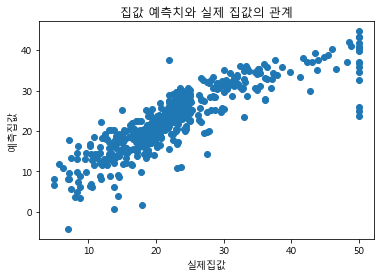

In [6]:
# 관계검정

# 훈련받은걸로 예측해보장... 원래는 테스트용으로 넘겨줘야하는데
pred = model_boston.predict(boston.data)

# 실제 집값
plt.scatter(boston.target, pred)
plt.xlabel("실제집값")
plt.ylabel("예측집값")
plt.title("집값 예측치와 실제 집값의 관계")

C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


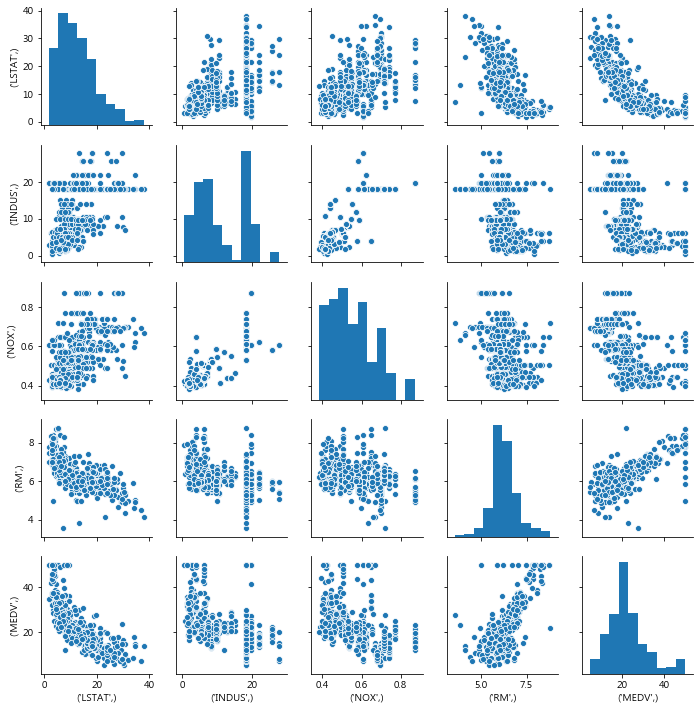

In [7]:
# 어떤 변수가 집값에 가장 큰 영향을 미칠지 알아보기 - 그래프(정성적 확인)

# seaborn의 pairplot
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head(10)

# 평균집값
df["MEDV"] = boston.target
df.head(10)

cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"] # 컬럼 4개뽑아서 집값과 어느정도 관계있는지 알아보자
sns.pairplot(df[cols], size=2)

# NOX, RM 는 관계가 없는 걸로 알수있다
# RM은 집값에 큰영향을 미친다

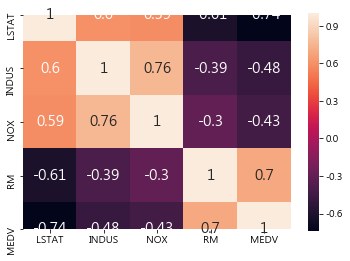

In [10]:
# 어떤 변수가 집값에 가장 큰 영향을 미칠지 알아보기 - 수치(정량적 확인)

# seaborn의 heatmap 이용
# 상관계수 구해주기
cc = np.corrcoef(df[cols].values.T) # column계수의 값들만 뽑아오기
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True, square=True,
           annot_kws={"size":15})

In [58]:
# 방이 5개일때 집값은 ?달러 인가?

X = df[["RM"]].values # 입력값 2차원으로 맞춰주기
y = df[["MEDV"]].values # 2차원 dataframe

lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

house_val = lr.predict(np.array([[5]]))
print("방이 [%d]개인 주택 가격은 약 [%.f]달러이다. " %(5, house_val*1000))

[[9.10210898]] [-34.67062078]
방이 [5]개인 주택 가격은 약 [10840]달러이다. 


In [ ]:
# train test 사용해서 적절한 alpha값 찾아서 *-/*/*-/*-/-*-*/*-/*-/ 해보기!!!!!!!!!!!

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("훈련 점수 : ",lr.score(X_train, y_train))
print("테스트 점수 : ",lr.score(X_test, y_test))

훈련 점수 :  0.48689351384859914
테스트 점수 :  0.4725972743191255


In [60]:
ridge = Ridge().fit(X_train, y_train) 
print("훈련 점수 : ",ridge.score(X_train, y_train)) 
print("테스트 점수 : ",ridge.score(X_test, y_test)) 

훈련 점수 :  0.487506080183735
테스트 점수 :  0.46842523320821605


In [61]:
ridge001 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("훈련 점수 : ",ridge001.score(X_train, y_train)) 
print("테스트 점수 : ",ridge001.score(X_test, y_test)) 

훈련 점수 :  0.4875205319526087
테스트 점수 :  0.46795436996593376


## 분류형 선형모델

+ 로지스틱 회귀분석
    - 로지스틱 loss(cost) function
    
    이진분류에 대한것을 S자 곡선으로 꺾은것(Sigmoid function)
    
    1/ (1 + e^-w)
    
    
+ SVM에서 제공하는 선형모델
    - 교차 엔트로피 loss(cost) function
    

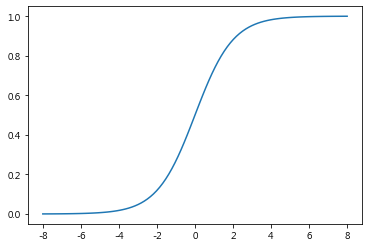

In [66]:
# sigmoid 그래프 그리기

def sigmoid(x):
    # 담을 리스트 변수 준비
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))
        
    return result

x = np.linspace(-8, 8, 100) # 가중치 100개 만들기 / 난수
sig = sigmoid(x)

plt.plot(x, sig)

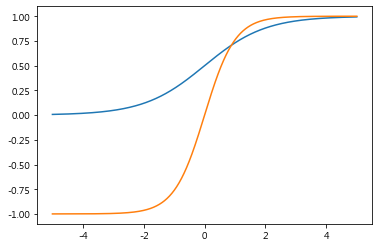

In [72]:
# 임의의 데이터 준비
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/(1+np.exp(-x)))

# 계속 미분하다보면 값이 약해져서 
# 범위를 좀더 늘려서 (sigmoid의 범위는 0 - 1까지 이므로)
# hyperbolic tan = tanh
plt.plot(x, np.tanh(x)) # 일반적인 sigmoid 보다 범위가 늘어남 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


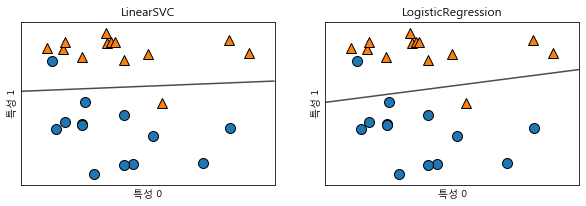

In [75]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
# 비슷한 결과를 나타냄
# 경계선이 조금 다름을 볼수있음 
# LinearSVC 경계선과 데이터 거리가 멀다 
# LogisticRegression 경계선과 데이터 거리가 가까움


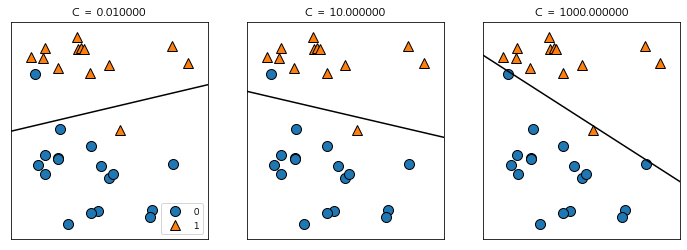

In [76]:
# C값을 조정함에 따라서 어떻게 달라지는지 알아보기 
mglearn.plots.plot_linear_svc_regularization()

# C = 1000 현재 데이터에 최적화해서 그려주게되면 분류자체가 한쪽에 편중되게 그려진다 
# C = 1000 -> 모델이 복잡해짐, 훈련용 데이터에 적합하게됨
# C값을 높게 줬을때 훈련 데이터에 치중됨  -> 과대적합
# C값이 낮을수록 일반화에 가까워짐 

In [7]:
# 유방암 데이터 샘플
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # dict로 묶여있음 / data : 데이터 / target : 정답 / target names : 정답에 대한 설명

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, 
                                                   stratify=cancer.target) # stratify=cancer.target : 비율 맞춰주기  

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 기본 상태로 훈련, 테스트 점수 알아보기

logreg = LogisticRegression(penalty="l2").fit(X_train, y_train) # c =1 로 세팅되어져있는 상태 # penalty="l2" : L2 norm 기본값 지정 

print("훈련 점수 : ",logreg.score(X_train, y_train)) # 95% 
print("테스트 점수 : ",logreg.score(X_test, y_test)) # 95% 훈련과 테스트 비슷하면 과소적합을 의심해볼수있지만, %값이 높기때문에.. 뭐.. 괜찮음

훈련 점수 :  0.9553990610328639
테스트 점수 :  0.958041958041958


In [11]:
# C값 증가시켜 훈련, 테스트 점수 알아보기 # C값은 10배 단위로 증가시키면 좋다 

logreg100 = LogisticRegression(C=100).fit(X_train, y_train) # C = 100

print("훈련 점수 : ",logreg100.score(X_train, y_train)) # C=1 일때보다 더 높은 값을 가짐. 훈련데이터에 더 적합한 값을 지니기 시작.
print("테스트 점수 : ",logreg100.score(X_test, y_test)) # but 테스트 값도 더 높아짐을 보아 C값이 높을수록 좋은거 
# C값이 높을수록 규제가 약해진걸로 볼수있다 / 즉, 규제를 한다는건 C값이 약하게 주는것

훈련 점수 :  0.971830985915493
테스트 점수 :  0.965034965034965


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# C값 감소시켜 훈련, 테스트 점수 알아보기

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) # C = 0.01

print("훈련 점수 : ",logreg001.score(X_train, y_train)) # 훈련점수가 나빠짐 = 일반화됨, 규제함 
print("테스트 점수 : ",logreg001.score(X_test, y_test)) 

훈련 점수 :  0.9342723004694836
테스트 점수 :  0.9300699300699301


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# L1 norm을 쓸것인지 L2 norm을 쓸것인지 지정 가능 / penalty 사용하는것에 따라 값이 달라질수있다 / penalty는 그냥.. 규제방식의 차이 
# 기본값은 L2 norm
# L1 norm : Lasso / L2 norm : Ridge

# C = 1 , penalty = L1 norm 인 상태

logreg_l1 = LogisticRegression(penalty="l1").fit(X_train, y_train) # c =1 로 세팅되어져있는 상태 # penalty="l1" : L1 norm 

print("훈련 점수 : ",logreg_l1.score(X_train, y_train)) # 96% 
print("테스트 점수 : ",logreg_l1.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.958041958041958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
# C = 100 , penalty = L1 norm 인 상태

logreg100_L1 = LogisticRegression(C=100, penalty="l1").fit(X_train, y_train) # C = 100

print("훈련 점수 : ",logreg100_L1.score(X_train, y_train)) # L2 : 97% 였는데 1% 더 증가함 
print("테스트 점수 : ",logreg100_L1.score(X_test, y_test)) # L2 : 96% 였는데 1% 더 증가함 

훈련 점수 :  0.9859154929577465
테스트 점수 :  0.9790209790209791


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# C = 0.01 , penalty = L1 norm 인 상태

logreg001_L1 = LogisticRegression(C=0.01, penalty="l1").fit(X_train, y_train) # C = 0.01

print("훈련 점수 : ",logreg001_L1.score(X_train, y_train)) # L2 : 93% 였는데 감소함
print("테스트 점수 : ",logreg001_L1.score(X_test, y_test)) # L2 : 93% 

훈련 점수 :  0.9178403755868545
테스트 점수 :  0.9300699300699301


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 다중 클래스 분류

In [21]:
# 앞에꺼는 두개중에 하나 선택하는 이진분류
# 세개의 값이 있다면 두개씩 두개씩 해서 이진분류를 여러번 수행했다.
# 대부분의 분석 시스템은 이진분류 방식 

# but logistic 회귀분석은 다중분류(여러개중에 하나 선택) 실행 가능 

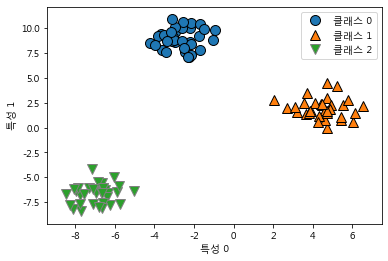

In [26]:
# 다중분류 샘플 
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:,1], y) # 두가지 특성에 의해서 3가지로 분류됨

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [29]:
linear_svm = LinearSVC().fit(X, y)

print(linear_svm.coef_.shape) # 가중치 크기 / 3행 2열 / 3개의 종류에 대해 2개의 특성을 지닌다 
print(linear_svm.intercept_.shape) # 절편 크기 / 클래스에 따른 종류

(3, 2)
(3,)


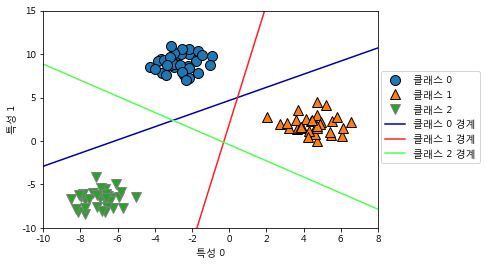

In [30]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

# 각각 두번씩 이진분류를 3번시킨 결과 

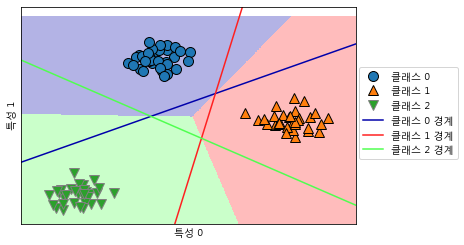

In [35]:
# 분류영역에 따라 색을 칠하자아아아
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.3) # fill = True : 색칠하기 / alpha =.3 : 투명도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

## 적합도 검정

+ Accuracy
+ Precision
+ Recall
+ F1 Score

In [ ]:
# 분류 검증 분야

# 암환자인가 아닌가 판단 = 이진분류

#---------------------------------
# 1000        정상판정     암판정
#---------------------------------
# 정상환자     988(TN)      2(FP)
# 암환자         1(FN)      9(TP)
#---------------------------------

# 1000명중 정상환자만 골라냈을때 98.8% but 암환자의 data는 가져오지 못함. 이진법의 한계? 측정도구가 정확도로만 측정해서는 안된다
# 정상환자 990, 암환자 10 데이터의 개수가 unbalance하다 / 그렇기에 여기서 정상환자만 보고서 정확도를 판단한다는것은 옳지않다
# 편향될 수 밖에 없다 / 무엇을 기준으로 두느냐에 따라 평가가 달라질 수 있다 
# 그렇기때문에 적합도 검정 진행함(Precision, Recall : 다른방향으로 측정하기 / 몇개 틀렸는지 보는 관점 -> F1 Score = Precision + Recall)

# Index(정상환자, 암환자) : 실제입력값 / Column(정상판정, 암판정) : 예측값
# 목적수단이 암환자를 검출하는 것이기 때문에 positive가 암환자 
# TN(True Negative) : 음성을 음성이라고 잘 판단함 / TP(True Positive) : 양성을 양성이라고 잘 판단함
# FN(False Negative) : 암환자인데 정상으로 판단 / FP(False Positive) : 정상인데 암환자로 판단

# 데이터가 불균형하기 때문에 잘한쪽만 보면 안됨, 못한 쪽도 봐야함

# Accuracy : (TN + TP) / all : 전체중에 True값이 몇개인가 / 대신 암환자의 검출 목적 상실됨
# Precision(→) : TP / (TP + FP) : Positive중 True값이 몇개인가
# Recall(↓) : TP / (TP + FN) : 암환자들중에 True값이 몇개인가 
# -> 암검출을 얼마나 잘했는가에 대해서 알아보기
# https://towardsdatascience.com/precision-vs-recall-386cf9f89488       참고! 

# 이모든것을 종합해서 보여주는 것이 => F1 score

In [ ]:
# confusion_matrix.pdf

# column : 예측값 / index : 지정값 / Precision(→)  / Recall(↓) 
# 대각선 : 잘맞춘값들
# D,B의 1 = FP

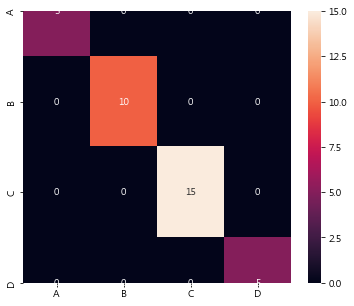

In [49]:
# Confusion matrix without confusion

arr = [[5, 0, 0, 0], 
       [0, 10, 0, 0], 
       [0, 0, 15, 0],
       [0, 0, 0, 5]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm

plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True)

In [59]:
# Confusion matrix with confusion
# Confusion matrix without normalization

arr = [[9, 1, 0, 0], 
       [1, 15, 3, 1], 
       [5, 0, 24, 1],
       [0, 4, 1, 15]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm

# A 10개중 9개
# B 20개중 15개
# C 30개중 24개
# D 20개중 15개
# -> 개수가 다 다르므로 normalization 해줘야한다 

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


In [60]:
# 정규화

total = np.sum(arr, axis=1) # 행기준
total

# 전체개수로 나눠주기
arr = arr / total[:, None] # None : 특정위치로 제한하지않음
arr

# confusion_matrix.pdf파일 p.4 -> True Negative for A : A가 아닌것을 보고 A가 아니라고 잘 판정한것
# confusion_matrix.pdf파일 p.4 -> False Positive for A : A인데 다르게 맞춘것들
# confusion_matrix.pdf파일 p.5 -> False Negative for A : A가 아닌데 A라고 맞춘것들

# confusion_matrix.pdf파일 p.6
# Model1 : ABCD의 총개수가 10개씩으로 같으니 Accuracy로 판단해도됨...............음......그러 ㅎ구나..ㅎ
# Model2 : ABCD의 총개수가 다를땐 Accuracy만 보면 안된다 

# confusion_matrix.pdf파일 p.7
# 조화평균 : h를 가지고 평균구하기
# Precision 0.492
# Recall 0.775
# Precision, Recall 값 이용해서 F1 Score 측정하면 0.601

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

In [63]:
# 샘플 준비
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1] # 실제값
y_pred = [0, 0, 2, 2, 0, 2] # 예측값

confusion_matrix(y_true, y_pred) # 총 4개 잘 맞춤 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [68]:
# 샘플 준비
y_true = [1, 0, 1, 1, 0, 1] # 실제값
y_pred = [0, 0, 1, 1, 0, 1] # 예측값

confusion_matrix(y_true, y_pred, labels=[1, 0]) # labels=[1, 0] : 인덱스 순서 바꿔주기 1, 0 

array([[3, 1],
       [0, 2]], dtype=int64)

In [72]:
# 레포트처럼 요약해서 나타내줌
from sklearn.metrics import classification_report
# https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/     참고

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=["class 0", "class 1"]))
# 자세한 계산결과까지 뽑아줌 

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [76]:
# ROC curve(AOC)
# 커브가 y쪽에 가깝게 휘어져있으면 좋은 성능을 갖는거라 볼수있음 

# 내가 원하는 분류 샘플 만드는거
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                          random_state=0)

In [77]:
model = LogisticRegression().fit(X, y)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
y_hat = model.predict(X)

In [79]:
print(y_hat[:40]) # 예측
print(y[:40]) # 실측

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [81]:
# 몇개가 맞았고 틀렸는지 confusion_matrix로 봐보기
confusion_matrix(y, y_hat) # 0을 0이라고 맞춘게 477, 1을 1이라고 맞춘게 474

array([[477,  20],
       [ 29, 474]], dtype=int64)

In [82]:
print(classification_report(y, y_hat, target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       497
     class 1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(0, 0.5, 'True Positive Rate(Recall)')

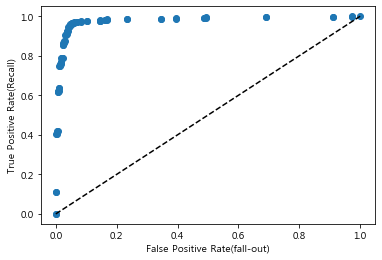

In [88]:
# 성능을 면적으로 나타내기
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
# 면적이 작을수록 성능이 떨어짐
# y축에 가까워질수록 면적이 커짐 = 성능이 좋아짐 

plt.plot(fpr, tpr, "o", label="Logistic Regression")
# curve선 자체가 y축에 상당히 가까움을 볼수있다 즉, 성능이 좋다 

plt.plot([0, 1], [0, 1], "k--", label="random guess")
# 클래스 분류 2중분류이므로 [0, 1] / 다중분류 사용ㄴㄴ

plt.xlabel("False Positive Rate(fall-out)") # Precision = fall-out : 양성으로 잘못판단했다는 의미 
plt.ylabel("True Positive Rate(Recall)")

### 사례1 : 타이타닉 예제

+ 성능을 제대로 측정했는지에 대한 관점

In [131]:
# 데이터를 불러오자요오오오오
df = pd.read_csv("data/train.csv")
df.head()
# Survived : 종속변수 / 나머지는 다 독립변수 
# Pclass : 객실등급 / SibSp : 동승자수 / Parch : 배우자 or 부모님 / Cabin : 객실번호 / Embarked : 정박지명 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
# 전처리 : 기계에게는 숫자로 바꿔줘야함 
# 그렇기에 전처리가 필요없는 컬럼만 따로 준비해주자 

cols_to_keep = ["Survived", "Age", "Fare"]

In [133]:
# Pclass 숫자가 갖는 크기의 의미를 없애야한다 / 의미없는 값으로 풀어버려야함 
# 그렇게 해주는 함수 불러오기

dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass") # prefix : 컬럼의 이름을 구분할수있도록 
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [134]:
# 성별도 전처리 진행
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex

# dummies 무조건 종류에 따라 컬럼으로 나눠버린다 

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [135]:
df1 = df[cols_to_keep].join(dummy_class.loc[:, "Pclass_1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [136]:
df1 = df1.join(dummy_sex.loc[:, "Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [137]:
# Survived를 제외한 나머지 컬럼 추출
train_cols = df1.columns[1:] 
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [138]:
# 결측치 확인
np.isnan(df1[train_cols])

# 결측치 처리
#--------------

# 결측치 삭제하는 방법
# df1[train_cols] = df1[train_cols].dropna(axis=0)
# df1["Survived"] = df1["Survived"].dropna(axis=0)

# 결측치 0으로 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

# => 지금까지 sklearn에 있는걸로 했다

In [139]:
# 분석한 결과에 대해 통계자료 쉽게 뽑아내는 패키지 
import statsmodels.api as sm

# 통계자료 자세하게 뽑아줌
model = sm.Logit(df1["Survived"], df1[train_cols]).fit() # 종속변수, 독립변수 
model.summary2()


# 독립변수에 따른 생존률 알아보기 
# Age.Coef_ : 음수값 : 나이가 많을수록 생존을 못하고있음을 알려줌  / 어릴수록 생존률 높음
# Fare.Coef_ : 양수값 : 요금이 높을수록 생존률이 더 높음을 알수있다 
# Pclass_1.Coef_ : 1 > 2 > 3 : 1등급 객실 승객들의 생존률이 높음을 알수있다
# Sex_male.Coef_ : 음수값 : 여성의 생존률이 더 높음

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2020-02-13 14:57 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [141]:
# 훈련시키기
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [144]:
# 훈련받은 데이터로 예측값 넣기
df1["predict"] = model2.predict(df1[train_cols])
df1.head(15)

# Survived 실제값 / predict 예측값 -> 비교해보기
# 훈련받은걸로 test해도 틀린값이 있음을 볼수있다 

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


In [146]:
# confusion_matrix로 몇개를 맞췄고 틀렸는지 알아보기
confusion_matrix(df1["Survived"], df1["predict"], labels=[1, 0])

array([[242, 100],
       [ 91, 458]], dtype=int64)

In [149]:
# Accuracy 정확도
print("정확도 : ", model2.score(df1[train_cols], df1["Survived"]))
print("정확도 : ", (242+458)/(242+100+91+458))
  # Accuracy만 보고 판단하면 안된다... 왜? 음.....음...
  # 모.. 같은 개수가 아니라서 Accuracy만 봐서는 안된다...그래서 classification_report 사용해보자..

정확도 :  0.7856341189674523
정확도 :  0.7856341189674523


In [151]:
print(classification_report(df1["Survived"], df1["predict"], target_names=["class 0", "class 1"]))
# 그렇지만... classification_report로 뽑아도 accuracy는 79%이다!!!!!!!!!!

              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83       549
     class 1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.79      0.79       891



Text(0, 0.5, 'True Positive Rate(Recall)')

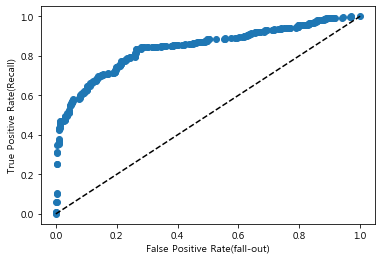

In [154]:
# 성능을 면적으로 나타내기
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df1["Survived"], model2.decision_function(df1[train_cols]))

plt.plot(fpr, tpr, "o", label="Logistic Regression")

plt.plot([0, 1], [0, 1], "k--", label="random guess")
# 클래스 분류 2중분류(죽었는지 살았는지)이므로 [0, 1] / 다중분류 사용ㄴㄴ

plt.xlabel("False Positive Rate(fall-out)") # Precision = fall-out : 양성으로 잘못판단했다는 의미 
plt.ylabel("True Positive Rate(Recall)")

### 사례2 : Cancer
+ 좋은 성능을 낼 방법에 대한 관점

In [172]:
# 유방암 데이터 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [173]:
# 데이터프레임형식으로 만들기 
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [174]:
# column추가 
data["class"] = pd.Series(cancer.target, dtype="category")
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [175]:
# 독립, 종속 변수 지정 
X = data.loc[:, "mean radius":"worst fractal dimension"]
y = data["class"]

In [176]:
# train, test 분리 시키기 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [177]:
# 훈련시키기
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [179]:
X2 = sm.add_constant(X) # 현재 입력값 상수로 바꾸기
model = sm.OLS(y, X2).fit()
print(model.summary()) # 선형모델 공식을 이용해 나온 통계자료는 모..동일하다.....ㅎ
# 30개의 column이 있기에 어떤게 제일 영향있는지 알아볼수있음 
# P-value값 중점적으로 보기 why?

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.05e-153
Time:                        15:44:56   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [180]:
from sklearn import metrics

# 전체를 가지고 정확도 측정하기
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred)) # 96%의 정확도 나옴 

정확도 :  0.958041958041958


In [181]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[52,  1],
       [ 5, 85]], dtype=int64)

In [183]:
# p-value < 0.05 인거 X 에 넣기 = 관계가 많은것, 영향력이 높은거 가져오기
# 독립, 종속 변수 만들기 
X = data[["mean compactness", "smoothness error", "concavity error", "worst radius", "worst area"]]
y = data[["class"]]

In [184]:
# train, test 분리 시키기 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [186]:
# 훈련시키기
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
X2 = sm.add_constant(X) # 현재 입력값 상수로 바꾸기
model = sm.OLS(y, X2).fit()
print(model.summary()) # 선형모델 공식을 이용해 나온 통계자료는 모..동일하다.....ㅎ
# 30개의 column이 있기에 어떤게 제일 영향있는지 알아볼수있음 
# P-value값 중점적으로 보기 why?

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.37e-137
Time:                        15:58:17   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

C:\Users\acorn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [189]:
# 전체를 가지고 정확도 측정하기
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred)) 
# 92%의 정확도 나옴 # 제일 의미있는 column들 모아서 했는데 전체 모아서 한것 보다 낮은 정확도를 가짐 
# 이럴땐 L2 규제를 쓰는게 좋음 

정확도 :  0.9230769230769231


In [191]:
# p-value 많이 큰거 가져오기 = 관계가 많이 없는 column들 가져오기 
# 독립, 종속 변수 만들기 
X = data[["mean texture", "mean smoothness", "mean fractal dimension", "mean symmetry", "texture error"]]
y = data[["class"]]

In [192]:
# train, test 분리 시키기 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [193]:
# 훈련시키기
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
X2 = sm.add_constant(X) # 현재 입력값 상수로 바꾸기
model = sm.OLS(y, X2).fit()
print(model.summary()) # 선형모델 공식을 이용해 나온 통계자료는 모..동일하다.....ㅎ
# 30개의 column이 있기에 어떤게 제일 영향있는지 알아볼수있음 
# P-value값 중점적으로 보기 why?

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           3.39e-66
Time:                        16:08:27   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\acorn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [195]:
# 전체를 가지고 정확도 측정하기
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred)) 
# 72%의 정확도 나옴 
# 30개의 column전부다 유방암에 영향이 있음을 알려줌 

정확도 :  0.7202797202797203
